In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, "../../")
from topological_codes import RepetitionQubit
from qiskit import execute, Aer, QuantumCircuit, QuantumRegister

In [3]:
qubit = RepetitionQubit({"d":3},"t")
qubit.stabilize()
qubit.stabilize()
qubit.logical_x()
qubit.lattice_readout_z()

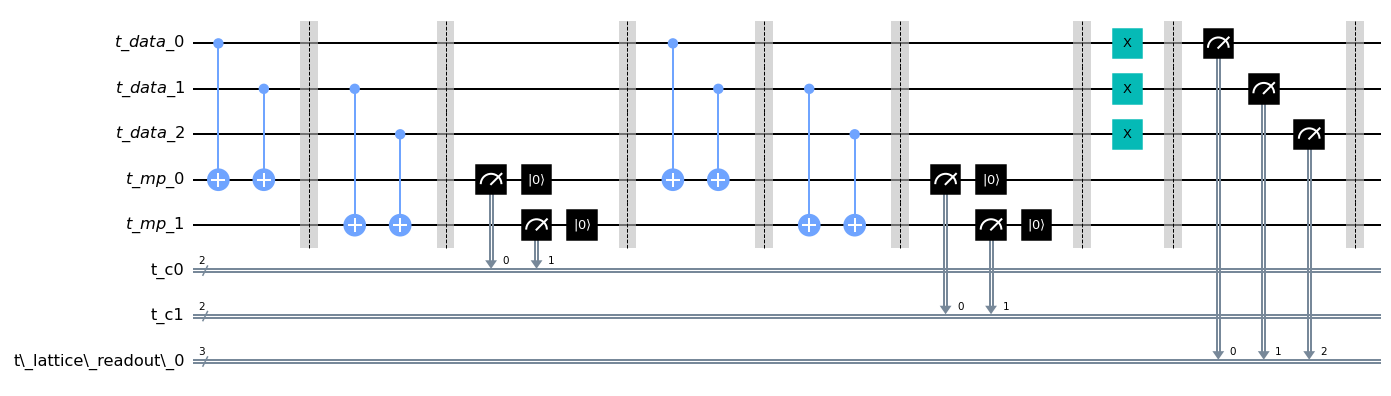

In [4]:
qubit.draw(output='mpl', fold=150)

In [5]:
execute(qubit.circ, Aer.get_backend('qasm_simulator')).result().get_counts()

{'111 00 00': 1024}

In [6]:
qubit = RepetitionQubit({"d":3},"t")
qubit.stabilize()
qubit.circ.x(0)
qubit.stabilize()
qubit.circ.x(0)
qubit.lattice_readout_z()

In [10]:
results = execute(qubit.circ, Aer.get_backend('qasm_simulator'), shots=1).result().get_counts()
readout_string = list(results.keys())[0]
print("Readout String: ", readout_string)
logical_readout, syndromes = qubit.parse_readout(readout_string)
print("Logical Readout: ", logical_readout)
print("Syndromes: \n", syndromes)

Readout String:  000 01 00
Logical Readout:  0
Syndromes: 
 {'P': [(0.0, 0.5, 0.5), (1.0, 0.5, 0.5)]}
